## Plots of Raw Means for SNAP Participation

#### I show the raw means of SNAP participation using Matplotlib

### Importing Libraries

In [1]:
import pandas as pd

df = pd.read_stata("df_analysis.dta")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


#### Define states that  expanded Medicaid 

In [4]:
df["medic"] = 0

expansion_states = [
    4, 5, 6, 8, 9, 10, 11, 15, 17, 19, 21, 24, 25,
    26, 27, 32, 33, 34, 35, 36, 38, 39, 41, 44,
    50, 53, 54, 18, 2, 30, 22
]

df.loc[df["statefip"].isin(expansion_states), "medic"] = 1


### Define SNAP Variable

In [6]:
df["SNAP1"] = 0
df.loc[df["foodstmp"] == 2, "SNAP1"] = 1


df["SNAP1"].value_counts(dropna=False)


SNAP1
0    2056396
1     261612
Name: count, dtype: int64

### Plotting SNAP Participation (for all individuals in the data)

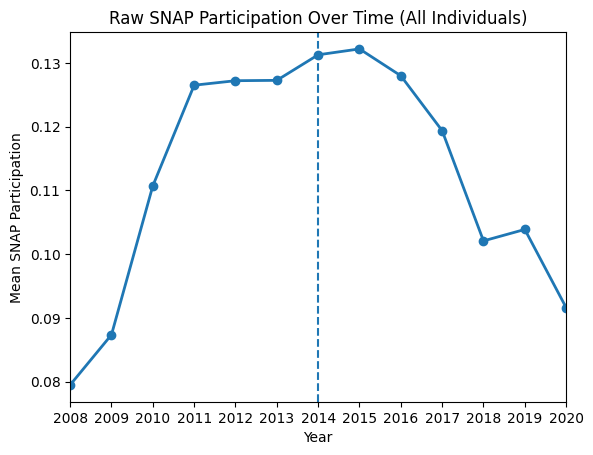

In [7]:

# Keep years 2008–2020

df_plot = df[(df["year"] >= 2008) & (df["year"] <= 2020)].copy()


# Collapse: mean SNAP1 by year
snap_year = (
    df_plot
    .groupby("year", as_index=False)["SNAP1"]
    .mean()
)


# Plot
plt.figure()
plt.plot(
    snap_year["year"],
    snap_year["SNAP1"],
    marker="o",
    linewidth=2
)

# Vertical line at Medicaid expansion
plt.axvline(2014, linestyle="--")

# Axes formatting
plt.xlim(2008, 2020)
plt.xticks(range(2008, 2021))
plt.xlabel("Year")
plt.ylabel("Mean SNAP Participation")
plt.title("Raw SNAP Participation Over Time (All Individuals)")

# Clean white background (Stata-like)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

plt.show()


#### Ploting SNAP participation (for individuals with income below 138% FPL)

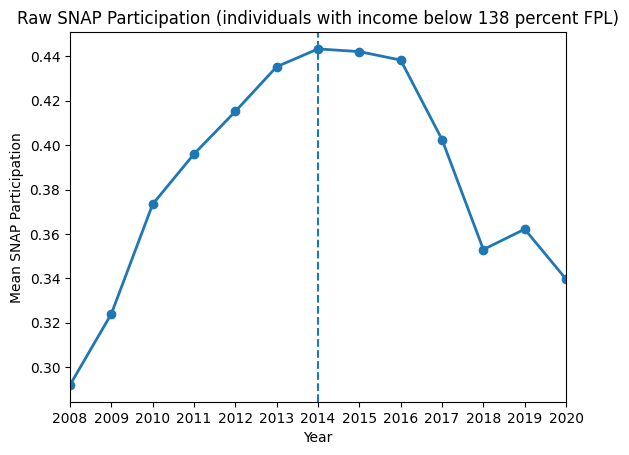

In [9]:

# Keep medicaid-eligible

df_plot = df[
    (df["medicaid_eligible"] == 1)
].copy()


# Collapse: mean SNAP1 by year
snap_year = (
    df_plot
    .groupby("year", as_index=False)["SNAP1"]
    .mean()
)

plt.figure()
plt.plot(
    snap_year["year"],
    snap_year["SNAP1"],
    marker="o",
    linewidth=2
)

# Medicaid expansion line
plt.axvline(2014, linestyle="--")

# Axes formatting
plt.xlim(2008, 2020)
plt.xticks(range(2008, 2021))
plt.xlabel("Year")
plt.ylabel("Mean SNAP Participation")
plt.title("Raw SNAP Participation (individuals with income below 138 percent FPL)")

# White background (Stata style)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

plt.show()


#### Plotting SNAP Participation for 138% FPL individuals(by state expansion status)

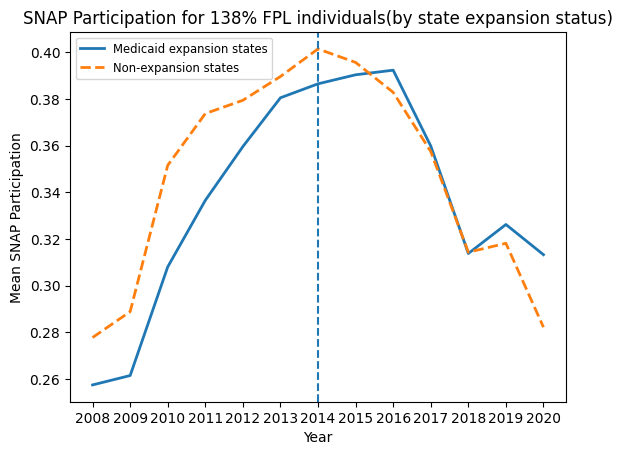

In [12]:
# restriction
df_plot = df[
    (df["medicaid_eligible"] == 1) &
    (df["sample1"] == 1)
].copy()

# Collapse: mean SNAP1 by year and expansion status

snap_year = (
    df_plot
    .groupby(["year", "medic"], as_index=False)["SNAP1"]
    .mean()
)

# Split data
snap_expand = snap_year[snap_year["medic"] == 1]
snap_nonexpand = snap_year[snap_year["medic"] == 0]

# Plot

plt.figure()

plt.plot(
    snap_expand["year"],
    snap_expand["SNAP1"],
    linewidth=2,
    label="Medicaid expansion states"
)

plt.plot(
    snap_nonexpand["year"],
    snap_nonexpand["SNAP1"],
    linestyle="--",
    linewidth=2,
    label="Non-expansion states"
)

# Medicaid expansion line
plt.axvline(2014, linestyle="--")

# Axes formatting
plt.xticks(range(2008, 2021))
plt.xlabel("Year")
plt.ylabel("Mean SNAP Participation")
plt.title("SNAP Participation for 138% FPL individuals(by state expansion status)")

# Legend
plt.legend(fontsize="small")

# White background (Stata-style)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

plt.show()


In [13]:
## Restriction

df_plot = df[
    (df["medicaid_eligible"] == 1) &
    (df["sample1"] == 1) &
    (df["year"].between(2008, 2020))
].copy()




#### Plotting SNAP Participation for  138% FPL individuals (by state expansion status and gender)

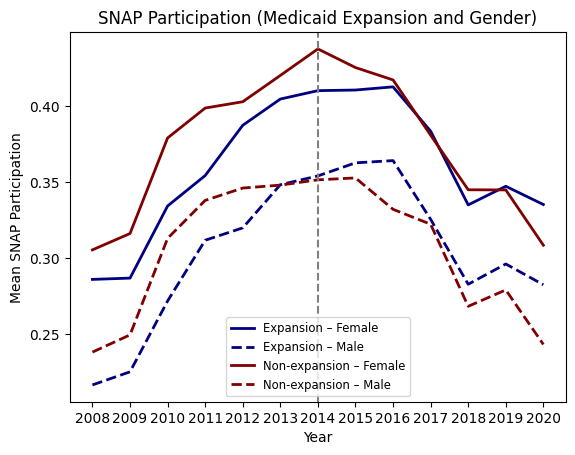

In [15]:
fig, ax = plt.subplots()

##Collaspe

collapsed = (
    df_plot
    .groupby(["year", "medic", "female"], as_index=False)
    .agg(SNAP1=("SNAP1", "mean"))
)

# Expansion states
ax.plot(
    collapsed.query("medic == 1 & female == 1")["year"],
    collapsed.query("medic == 1 & female == 1")["SNAP1"],
    color="navy",
    linestyle="-",
    linewidth=2,
    label="Expansion – Female",
)

ax.plot(
    collapsed.query("medic == 1 & female == 0")["year"],
    collapsed.query("medic == 1 & female == 0")["SNAP1"],
    color="navy",
    linestyle="--",
    linewidth=2,
    label="Expansion – Male",
)

# Non-expansion states
ax.plot(
    collapsed.query("medic == 0 & female == 1")["year"],
    collapsed.query("medic == 0 & female == 1")["SNAP1"],
    color="maroon",
    linestyle="-",
    linewidth=2,
    label="Non-expansion – Female",
)

ax.plot(
    collapsed.query("medic == 0 & female == 0")["year"],
    collapsed.query("medic == 0 & female == 0")["SNAP1"],
    color="maroon",
    linestyle="--",
    linewidth=2,
    label="Non-expansion – Male",
)

# Policy line
ax.axvline(2014, linestyle="--", color="gray")

# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Mean SNAP Participation")
ax.set_title("SNAP Participation (Medicaid Expansion and Gender)")

ax.set_xticks(range(2008, 2021))
ax.legend(fontsize="small")

plt.show()


#### Plotting SNAP Participation for 138% FPL individuals (by state expansion status and hispanic status) 

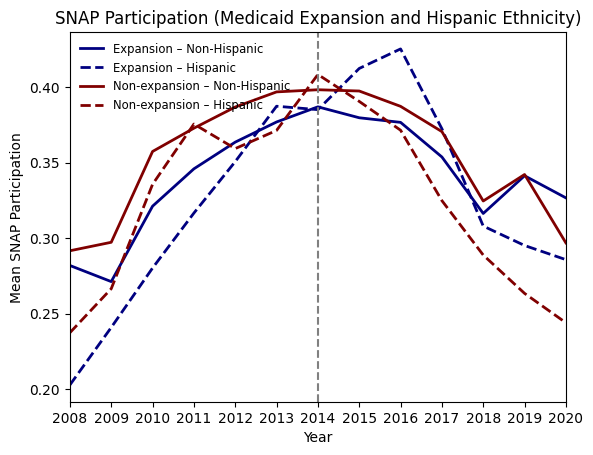

In [17]:

df_plot["hispanic_ind"] = df_plot["hispanic"].astype(int)

# Collapse: mean SNAP1 by year × medic × hispanic
collapsed = (
    df_plot
    .groupby(["year", "medic", "hispanic_ind"], as_index=False)
    .agg(SNAP1=("SNAP1", "mean"))
)

# Plot
fig, ax = plt.subplots()

# Expansion states
ax.plot(
    collapsed.query("medic == 1 & hispanic_ind == 0")["year"],
    collapsed.query("medic == 1 & hispanic_ind == 0")["SNAP1"],
    color="navy", linestyle="-", linewidth=2,
    label="Expansion – Non-Hispanic",
)

ax.plot(
    collapsed.query("medic == 1 & hispanic_ind == 1")["year"],
    collapsed.query("medic == 1 & hispanic_ind == 1")["SNAP1"],
    color="navy", linestyle="--", linewidth=2,
    label="Expansion – Hispanic",
)

# Non-expansion states
ax.plot(
    collapsed.query("medic == 0 & hispanic_ind == 0")["year"],
    collapsed.query("medic == 0 & hispanic_ind == 0")["SNAP1"],
    color="maroon", linestyle="-", linewidth=2,
    label="Non-expansion – Non-Hispanic",
)

ax.plot(
    collapsed.query("medic == 0 & hispanic_ind == 1")["year"],
    collapsed.query("medic == 0 & hispanic_ind == 1")["SNAP1"],
    color="maroon", linestyle="--", linewidth=2,
    label="Non-expansion – Hispanic",
)

# Formatting (mirror Stata)
ax.axvline(2014, linestyle="--", color="gray")
ax.set_xlim(2008, 2020)
ax.set_xticks(range(2008, 2021))
ax.set_xlabel("Year")
ax.set_ylabel("Mean SNAP Participation")
ax.set_title("SNAP Participation (Medicaid Expansion and Hispanic Ethnicity)")

ax.legend(
    fontsize="small",
    loc="upper left",
    frameon=False,
)

plt.show()


#### Plotting SNAP Participation for 138% FPL individuals (by state expansion status and High-school completion)

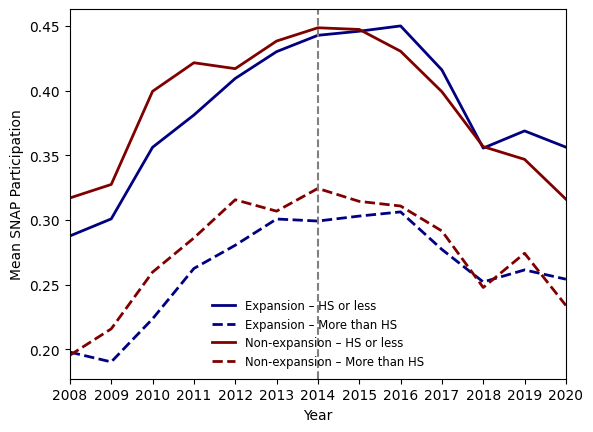

In [18]:
# Collapse: mean SNAP by year × medic × HSorless
collapsed = (
    df_plot
    .groupby(["year", "medic", "HSorless"], as_index=False)
    .agg(SNAP1=("SNAP1", "mean"))
)

# Plot
fig, ax = plt.subplots()

# Expansion states
ax.plot(
    collapsed.query("medic == 1 & HSorless == 1")["year"],
    collapsed.query("medic == 1 & HSorless == 1")["SNAP1"],
    color="navy", linestyle="-", linewidth=2,
    label="Expansion – HS or less",
)

ax.plot(
    collapsed.query("medic == 1 & HSorless == 0")["year"],
    collapsed.query("medic == 1 & HSorless == 0")["SNAP1"],
    color="navy", linestyle="--", linewidth=2,
    label="Expansion – More than HS",
)

# Non-expansion states
ax.plot(
    collapsed.query("medic == 0 & HSorless == 1")["year"],
    collapsed.query("medic == 0 & HSorless == 1")["SNAP1"],
    color="maroon", linestyle="-", linewidth=2,
    label="Non-expansion – HS or less",
)

ax.plot(
    collapsed.query("medic == 0 & HSorless == 0")["year"],
    collapsed.query("medic == 0 & HSorless == 0")["SNAP1"],
    color="maroon", linestyle="--", linewidth=2,
    label="Non-expansion – More than HS",
)

# Formatting (mirror Stata)
ax.axvline(2014, linestyle="--", color="gray")
ax.set_xlim(2008, 2020)
ax.set_xticks(range(2008, 2021))
ax.set_xlabel("Year")
ax.set_ylabel("Mean SNAP Participation")
ax.set_title("")

ax.legend(
    fontsize="small",
    loc="lower center",   # position(6) equivalent
    frameon=False,
    ncol=1,
)

plt.show()
